# Project demonstration

This notebook serves as a demonstration of what the toolbox can do. This project is a work in progress, so there will be updates to the code and subsequently the applications. Below are some highlights of what is currently possible.

## Datasets

The starting point of the project is the ability to easily load chemical datasets into a format that is usable from a Machine Learning perspective. All the relevant datasets make use of **SMILES** (Simplified molecular-input line-entry system) to store information on molecules. The in-built DataSets then take the SMILES representation of molecules together with a target array and any other additional information, and load then into **graphs**.

Below are some examples of dataset that can, similarly to the torch datasets, download and load a dataset from the internet.

### LogP dataset:

In [1]:
import torch.optim

from dglchem.datasets import LogP
data = LogP(log=True)

SMILES c1cc(C)ccc1O[Si]12OCCN(CCO1)CCO2 in index 4816 contains the atom Si that is not permitted and will be ignored.
SMILES CC1=CC=C(O[Si]23OCCN(CCO2)CCO3)C=C1 in index 4817 contains the atom Si that is not permitted and will be ignored.
SMILES [H]C1=C([H])C(=C([H])C([H])=C1O[Si]12OC([H])([H])C([H])([H])N(C([H])([H])C([H])([H])O1)C([H])([H])C([H])([H])O2)C([H])([H])[H] in index 4818 contains the atom Si that is not permitted and will be ignored.
SMILES c3cc(C)ccc3O[Si]12OCCN(CCO2)CCO1 in index 4819 contains the atom Si that is not permitted and will be ignored.
SMILES Cc1ccc(cc1)O[Si]12OCCN(CCO1)CCO2 in index 4820 contains the atom Si that is not permitted and will be ignored.
SMILES Cc1ccc(O[Si]23OCCN(CCO2)CCO3)cc1 in index 4821 contains the atom Si that is not permitted and will be ignored.
SMILES c1ccc(Cl)cc1O[Si]12OCCN(CCO1)CCO2 in index 6328 contains the atom Si that is not permitted and will be ignored.
SMILES [H]C1=C([H])C(O[Si]23OC([H])([H])C([H])([H])N(C([H])([H])C([H])([H])O

In [2]:
print(data.smiles[0:5])

['CCC1(c2ccccc2)NC(=O)N(C)C1=O', 'CCC1(c2ccccc2)N=C(O)N(C)C1=O', 'CCN(CC)C(O)=C1C=C2c3cccc4[nH]cc(c34)C[C@H]2N(C)C1', 'CCN(CC)C(=O)C1=CC2c3cccc4[nH]cc(c34)CC2N(C)C1', 'CCN(CC)C(=O)C1=CC2c3cccc4[nH]cc(c34)C[C@H]2N(C)C1']


As seen above, the data loader filters the SMILES based a few different criteria. One of them is a check if rdkit [1] recognizes the SMILES representation as valid, another one is the use of a list of *allowed* atom symbols. After filtering, we can access the information using the regular class notations.

### Example outputs:

In [3]:
# SMILES
data.smiles[0:5]

['CCC1(c2ccccc2)NC(=O)N(C)C1=O',
 'CCC1(c2ccccc2)N=C(O)N(C)C1=O',
 'CCN(CC)C(O)=C1C=C2c3cccc4[nH]cc(c34)C[C@H]2N(C)C1',
 'CCN(CC)C(=O)C1=CC2c3cccc4[nH]cc(c34)CC2N(C)C1',
 'CCN(CC)C(=O)C1=CC2c3cccc4[nH]cc(c34)C[C@H]2N(C)C1']

In [4]:
# Their corresponding graphs, saved using the torch geometric Data objects.
data[0:5]

[Data(x=[16, 42], edge_index=[2, 34], edge_attr=[34, 12], y=[1]),
 Data(x=[16, 42], edge_index=[2, 34], edge_attr=[34, 12], y=[1]),
 Data(x=[24, 42], edge_index=[2, 54], edge_attr=[54, 12], y=[1]),
 Data(x=[24, 42], edge_index=[2, 54], edge_attr=[54, 12], y=[1]),
 Data(x=[24, 42], edge_index=[2, 54], edge_attr=[54, 12], y=[1])]

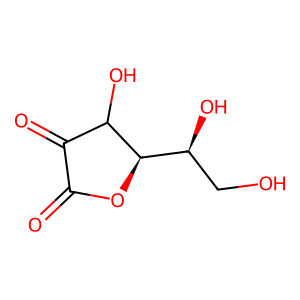

In [5]:
data.draw_smile(10)

In [6]:
# We can also save and load the dataset as such:
#   Dataset are saved using pickle, which allows for fast saving and loading. Saving a dataset and then loading instead of loading from, for example, an excel file is about 10 to 20 times faster.

from dglchem.utils import DataSet

data.save_dataset('LogP')
loaded_dataset = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/LogP.pickle')
loaded_dataset.smiles[0:5]

File saved at: ./data/processed/LogP.pickle
Loaded dataset.


['CCC1(c2ccccc2)NC(=O)N(C)C1=O',
 'CCC1(c2ccccc2)N=C(O)N(C)C1=O',
 'CCN(CC)C(O)=C1C=C2c3cccc4[nH]cc(c34)C[C@H]2N(C)C1',
 'CCN(CC)C(=O)C1=CC2c3cccc4[nH]cc(c34)CC2N(C)C1',
 'CCN(CC)C(=O)C1=CC2c3cccc4[nH]cc(c34)C[C@H]2N(C)C1']

### Analysis:

There are several options to analyze a loaded dataset. Below are some of these options.

#### Compound numbers chart:
This chart is based on 

Loaded dataset.


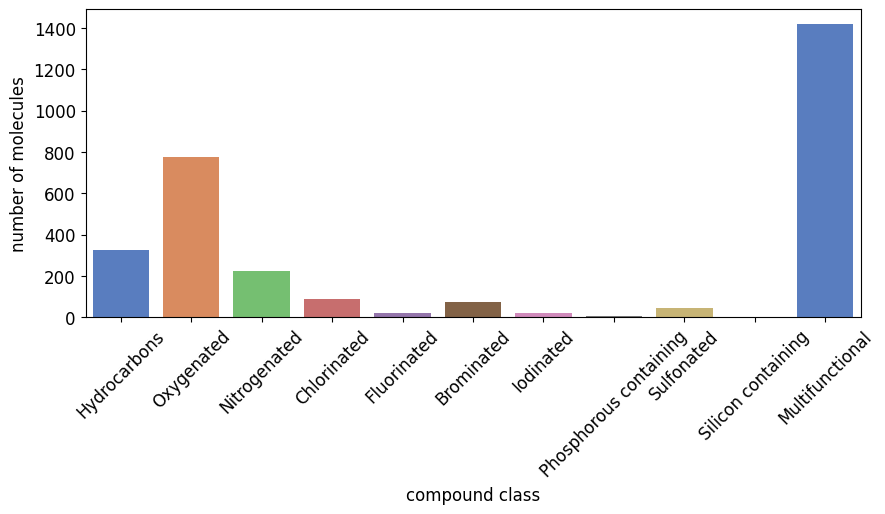

In [7]:
from dglchem.utils import compound_nums_chart

data = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/BradleyDoublePlus.pickle')
compound_nums_chart(data.smiles, fig_size=(10,4))

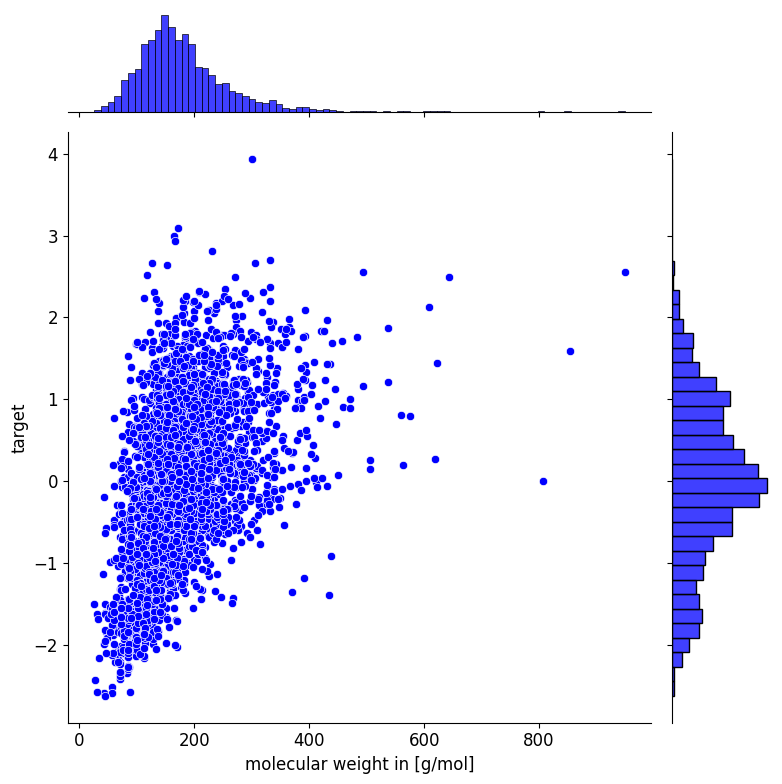

In [8]:
%matplotlib inline
data.weight_vs_target_plot(fig_height=3, save_fig=True)

Loaded dataset.


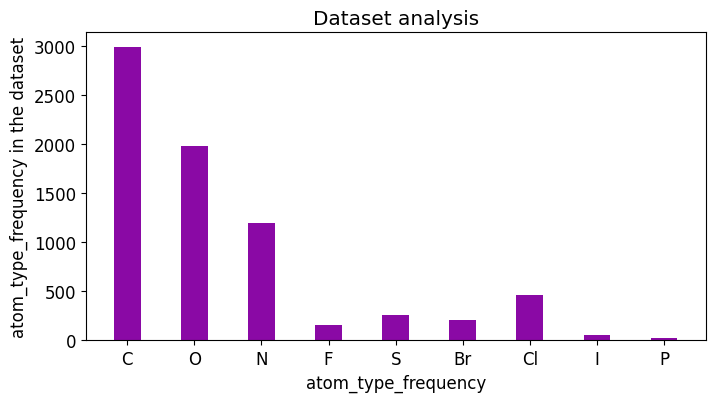

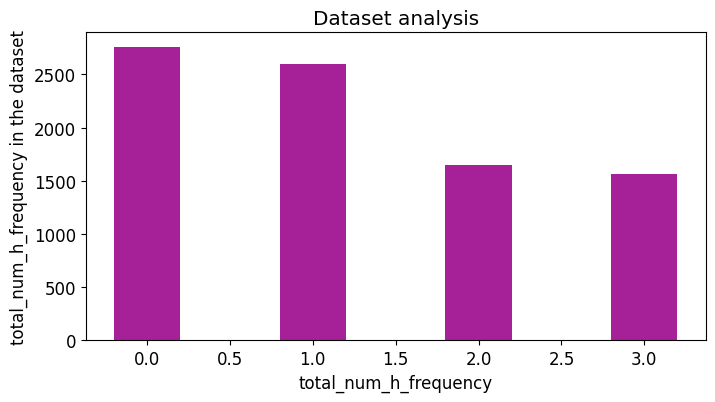

In [9]:
%matplotlib inline

from dglchem.utils import DataSet
data = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/BradleyDoublePlus.pickle')

results, figures = data.analysis(download=True, plots=['atom_type_frequency','total_num_h_frequency'], fig_size=[8,4])

### Butina clustering:

In [1]:
from dglchem.datasets import BradleyDoublePlus
from dglchem.utils.data_splitting import taylor_butina_clustering
data = BradleyDoublePlus()

clusters = taylor_butina_clustering(data, threshold=0.8, radius=3)

Number of single molecule clusters: 124 and the ratio is: 0.432 of single molecule clusters.


## GNN Model:

In [11]:
from dglchem.utils import DataSet

data = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/BradleyDoublePlus.pickle')

train, test, val = data.get_splits()
print(train[1:10])

Loaded dataset.
[Data(x=[16, 42], edge_index=[2, 32], edge_attr=[32, 12], y=[1]), Data(x=[25, 42], edge_index=[2, 56], edge_attr=[56, 12], y=[1]), Data(x=[6, 42], edge_index=[2, 10], edge_attr=[10, 12], y=[1]), Data(x=[6, 42], edge_index=[2, 10], edge_attr=[10, 12], y=[1]), Data(x=[4, 42], edge_index=[2, 6], edge_attr=[6, 12], y=[1]), Data(x=[11, 42], edge_index=[2, 22], edge_attr=[22, 12], y=[1]), Data(x=[16, 42], edge_index=[2, 32], edge_attr=[32, 12], y=[1]), Data(x=[12, 42], edge_index=[2, 26], edge_attr=[26, 12], y=[1]), Data(x=[5, 42], edge_index=[2, 8], edge_attr=[8, 12], y=[1])]


In [12]:
print(f'Node feature dimension: {data.num_node_features}')
print(f'Edge feature dimension: {data.num_edge_features}')

Node feature dimension: 42
Edge feature dimension: 12


### Model definition:

In [13]:
from dglchem.models import MGConv, SimpleGNN
import torch
from torch.nn import Sequential

node_hidden_dim = 64
batch_size = 32

model_message = MGConv(num_layers=5, edge_hidden_dim=64, node_hidden_dim=node_hidden_dim, 
                node_in_dim=data.num_node_features, edge_in_dim=data.num_edge_features)

model = SimpleGNN(model_message=model_message,
                      input_pool_size=node_hidden_dim, 
                      output_size=1)

print(model)

device = torch.device('cpu')

SimpleGNN(
  (model): MGConv(
    (gnn_layers): ModuleList(
      (0-4): 5 x Weave()
    )
  )
  (lin_out): Linear(in_features=64, out_features=1, bias=True)
)


### Loss and Optimizer

In [14]:
from torch import nn

loss_func = nn.functional.mse_loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

### Training

In [15]:
from dglchem.utils import train_model

train_loss, val_loss = train_model(model = model,
                                   loss_func = loss_func,
                                   optimizer = optimizer,
                                   train_data_loader= train,
                                   val_data_loader = val,
                                   batch_size=batch_size,
                                   epochs=100,
                                   early_stopping=True,
                                   patience=20)

epoch=95, training loss= 0.141, validation loss= 0.224: 100%|██████████| 100/100 [00:59<00:00,  1.69it/s]


### Loss plot

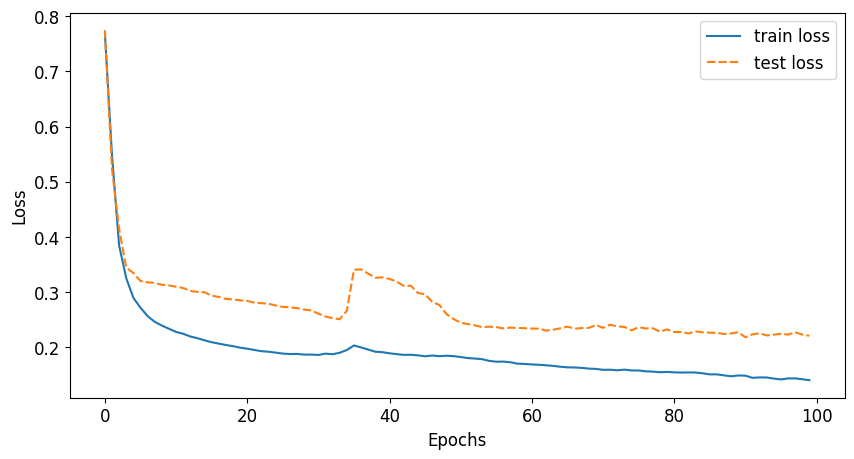

In [16]:
from dglchem.utils import loss_plot
loss_plot([train_loss, val_loss], ['train loss', 'test loss'])

### Testing

In [17]:
from dglchem.utils import test_model
test_model(model = model,
           test_data_loader= test,
           loss_func= loss_func)

100%|██████████| 10/10 [00:00<00:00, 117.54it/s]

Test loss: 0.182


0.18199120201170443

References
[1]